##**Algerian Forest Fire Dataset - Logistic Regression**

Create a logistic Regression model that will predict that wheter there will be fire or not in Algerian Forest.

**Steps-**



   **1) Data Collection**

* This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Bejajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.


*   122 instances for each region .
The Period is from June 2012 to September 2012.

*   The Dataset includes 11 attributes and 1 output attribute i.e. Classes.



*   The data consists of 14 column and 246 rows.













2) Exploratory data analysis

3) Data Cleaning

4) Exploratory Data Analysis

5) Creating Logistic Regression Model

6) Evaluation of a Classification Model


*   Confusion Matrix

*   Accuracy
*   Recall
*   Precision
*   F1 Score
*   AUC & ROC Curve











In [1]:
#importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Reading the Dataset as df

df = pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
#droping row 122 and 123
df.drop([122,123], inplace=True)

#reset_index
df.reset_index(inplace=True)

#drop index
df.drop('index', axis=1, inplace=True)

In [4]:
#creating "region" column

df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire



**Data Cleaning**

In [7]:
#summary of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [8]:
#checking columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [9]:
#removing unnecessory space in columns name using str.strip()

df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [10]:
#Check each Classes attribute's count

df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [11]:
#It's seems like their is unnecessory spacing in Classes

df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [12]:
#removing unnecessory space in Classes  using str.strip()

df.Classes = df.Classes.str.strip()


In [13]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [14]:
#finding null values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [15]:
#droping null value
df.dropna(inplace=True)

In [16]:
#Changing the datatype

df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

In [17]:
#Droping year column as all the value is from 2012

df1 = df.drop(['year'], axis=1)

****Exploratory Data Analysis****

Applying Label encoading in region and Classes Columns


In [18]:
#importing Label encoading from sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [19]:
df1['region'] = LabelEncoder.fit_transform(df1['region'])
df1['Classes'] = LabelEncoder.fit_transform(df1['Classes'])

In [20]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [21]:
#region: bejaia=1
#Classes: not fair=1



DataFrame Descripsion



In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [23]:
#Corelation Metrix 

df1_corr = df1.corr()
df1_corr

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,-0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,-0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,-0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,-0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,-0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,-0.263197


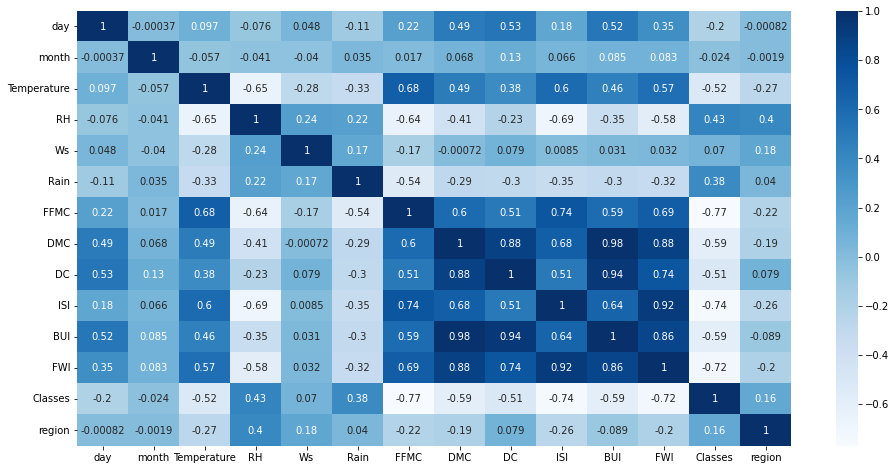

In [24]:
#ploting heat map

plt.figure(figsize=(16,8))
sns.heatmap(df1_corr, cmap='Blues', annot=True)
plt.show()

**Observations**


*   BUI and DMC are highly correlated
*   BUI and DC are highly correlated
*   FWI And ISI are highly correlated
*   Rain is negatively corelated with FFMC DMC DC ISI



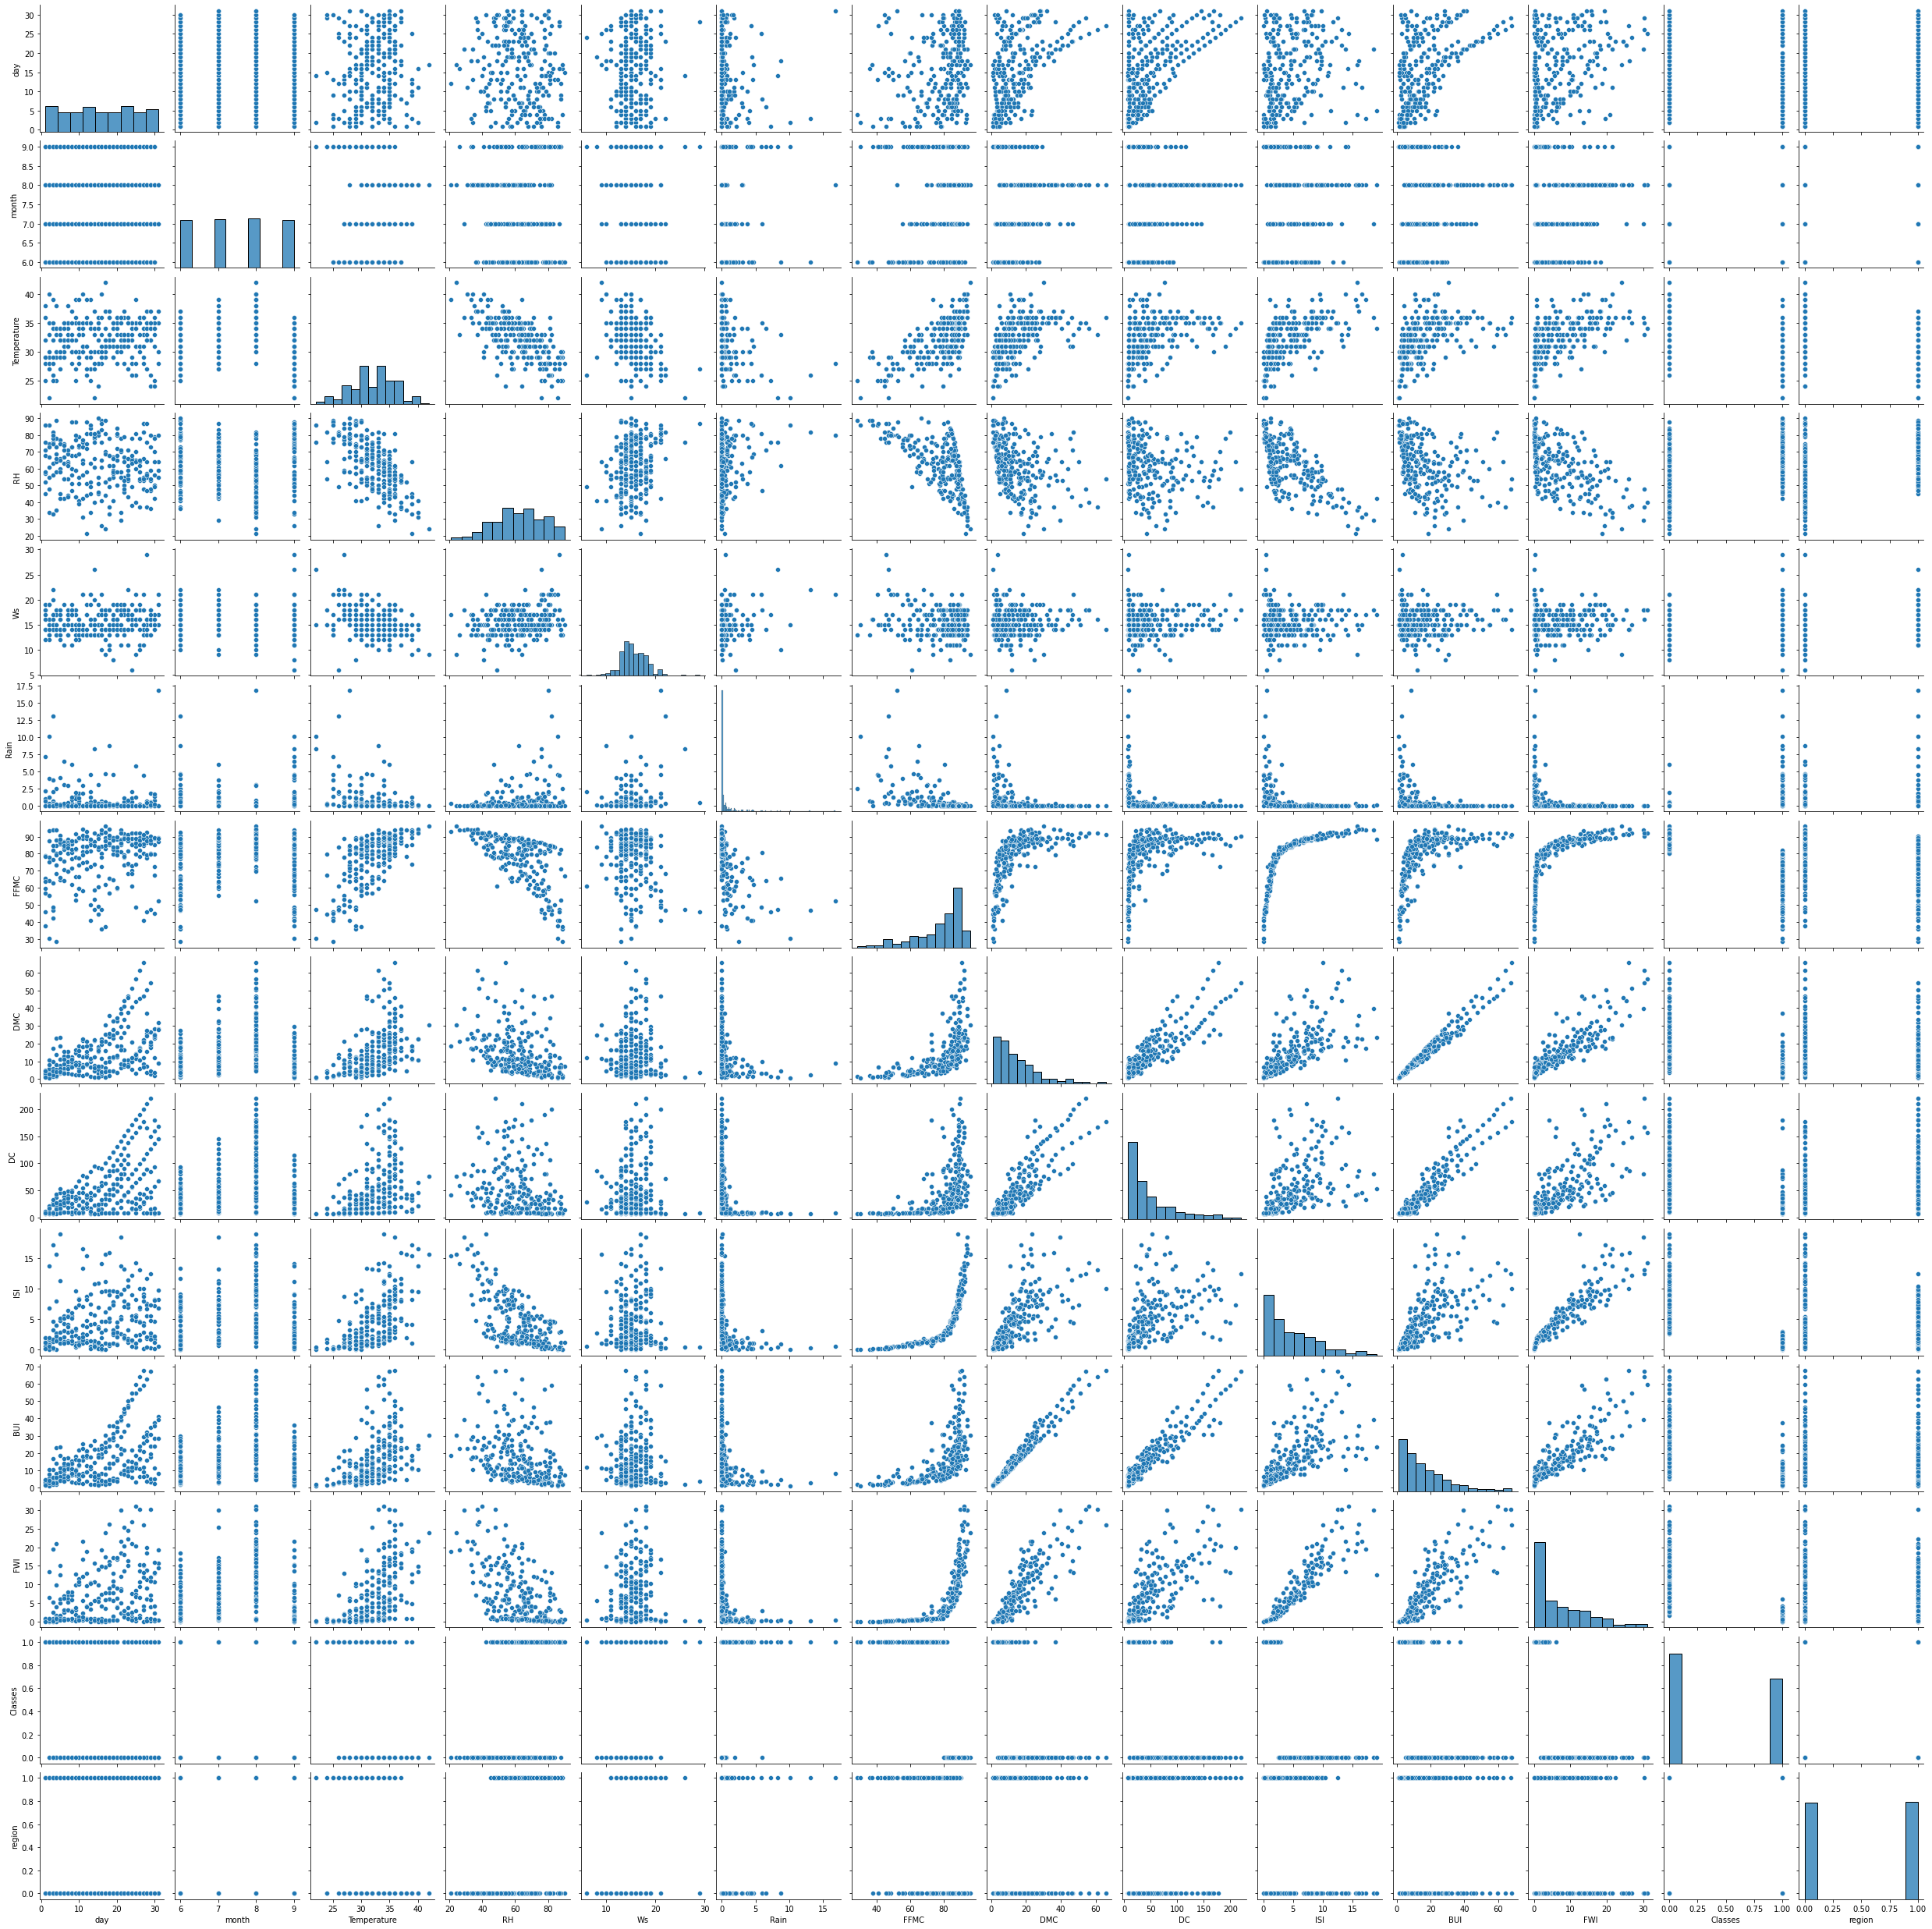

In [25]:
#pairplot

sns.pairplot(df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fbdd45d50>,
      dtype=object)

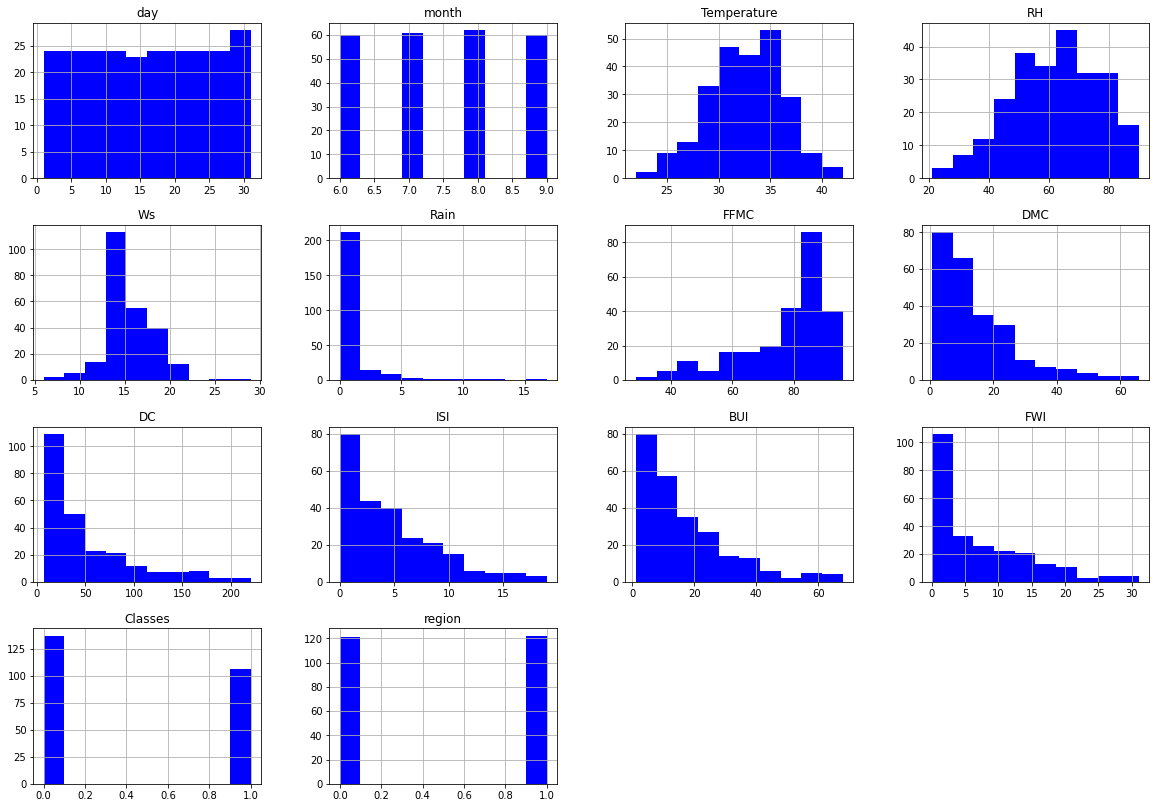

In [26]:
#Histrogram

df1.hist(figsize=(20,14), color='b')

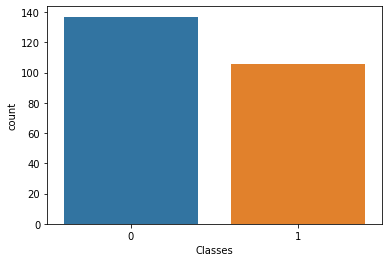

In [27]:
#countplot for Classes

sns.countplot(x=df1["Classes"])

**Obsarvation**

we have around 139 cases of fair and approx 100 cases of not fair. data is balanced.

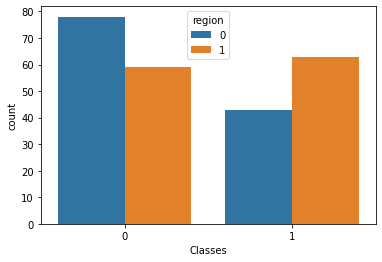

In [28]:
#Classes and Region
sns.countplot(data=df1, x='Classes', hue='region')

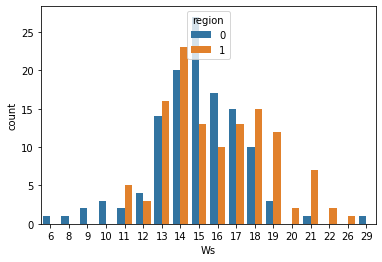

In [29]:
#windspeed according to region
sns.countplot(data=df1, x='Ws', hue='region')

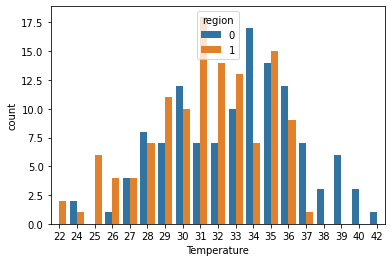

In [30]:
#Region wise Temp

sns.countplot(data=df1, x='Temperature', hue='region')

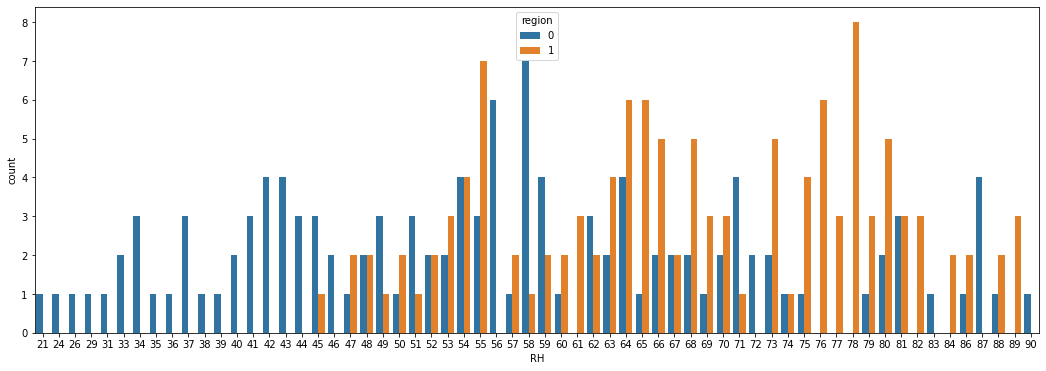

In [31]:
#Relative Humidity and region
plt.figure(figsize=(18,6))
sns.countplot(data=df1, x='RH', hue='region')
plt.show()

**Observation**

Plot **Classes and Region** shows that Sidi-Bal-Abbes region has more fire incidents.

**Many forest fires start from natural causes such as lightning which set trees on fire. However, rain extinguishes such fires without causing much damage. High atmospheric temperatures and dryness (low humidity) offer favorable circumstance for a fire to start.**


our plot **windspeed according to region** shows that Avg Wind Speed in Sidi-Bal-Abbes region is more as compaire to the Bejaia region.

Our last plot **Region wise Temp** shows that the Avg Temp in Sidi-Bal-Abbes region is more as compaire to Bejaia region.

Plot **Relative Humidity and Region** shows low humidity in Sidi-Bal-Abbes region.


**Model Building Using Logistic Regression**

**Creating Independent and Dependent Features**

In [32]:
df1.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [33]:
#independent features

X = df1[['Temperature', 'RH', 'Ws','Rain','FFMC','DMC','DC', 'ISI','BUI','FWI','region']]
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [34]:
#dependent feature

y=df1['Classes']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 243, dtype: int64

In [35]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns


# scaling X and converting to Dtaframe
X = pd.DataFrame(scale(X), columns=cols)


#renaming X columns as cols


#print columns in X
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,-0.936012,-0.880159,0.995893
1,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,-0.900798,-0.893626,0.995893
2,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,-0.985310,-0.934029,0.995893
3,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,-1.055737,-0.947497,0.995893
4,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,-0.900798,-0.880159,0.995893


*Spliting data into train test*

In [36]:
# split into train and test with train_size=70% and random_state=42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

**Creating Logistic Regression Model**

In [37]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [38]:
## Initialise LogisticRegression()

log_reg = LogisticRegression()


In [39]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [40]:
#intercepts and coef.

print('Intercept is :',log_reg.intercept_)
print('Coefficient is :',log_reg.coef_)

Intercept is : [-1.45677825]
Coefficient is : [[-0.11089742 -0.16749653  0.1058942  -0.25464323 -2.39938045  0.02676587
  -0.31913284 -2.23436312 -0.09930839 -1.73517236  0.11761885]]


In [41]:
#Traning score
Traning_score = log_reg.score(X_train,y_train)
Traning_score

0.9764705882352941

In [42]:
#Test score
Test_score = log_reg.score(X_test,y_test)
Test_score

0.958904109589041

In [44]:
#Prediction on Test data
log_reg_predict = log_reg.predict(X_test)


In [45]:
#Accuracy Score
accuracy = accuracy_score(y_test,log_reg_predict)
accuracy

0.958904109589041

#Evaluation of a Classification Model

In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted. The different metrics used for this purpose are:

* Accuracy
* Recall
* Precision
* F1 Score
* Specifity
* AUC( Area Under the Curve)
* RUC(Receiver Operator Characteristic)
* Confusion Matrix

**Confusion Metrix**

Used for evaluating the performance of a classification model. The matrix compares the actual target values with those predicted by the machine learning model.

In [47]:
cm = metrics.confusion_matrix(y_test, log_reg_predict)
cm

array([[43,  1],
       [ 2, 27]])

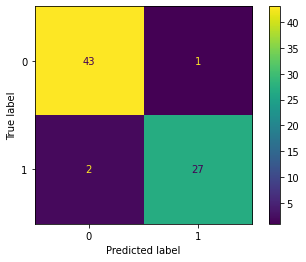

In [48]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [49]:
#reading values from confussion metrics
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]


**Accuracy**

Accuracy measures how often the model is correct.

accuracy = (True Positive + True Negative) / Total Predictions



In [50]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.958904109589041

**Our model has Accuracy of 95.89%**

**Precision**

Precision is a measure of amongst all the positive predictions, how many of them were actually positive.

Precision = (true positive) / (true positive + false positive)

In [51]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9772727272727273

**Our Model has Precision of 97.72%**

**Recall or Sensitivity**

Of all the positive cases, what percentage are predicted positive?

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative)



Recall(Sensitivity) = True Positive / (True Positive + False Negative)

In [52]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9555555555555556

**Sensitivity of our model is 95.55%**

**F1 Score**

a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall.

In [53]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9662921348314608

**ROC and AUC Curve**

**The Receiver Operator Characteristic (ROC)** curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.



The **Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [54]:
auc = roc_auc_score(y_test, log_reg_predict)
auc

0.9541536050156739

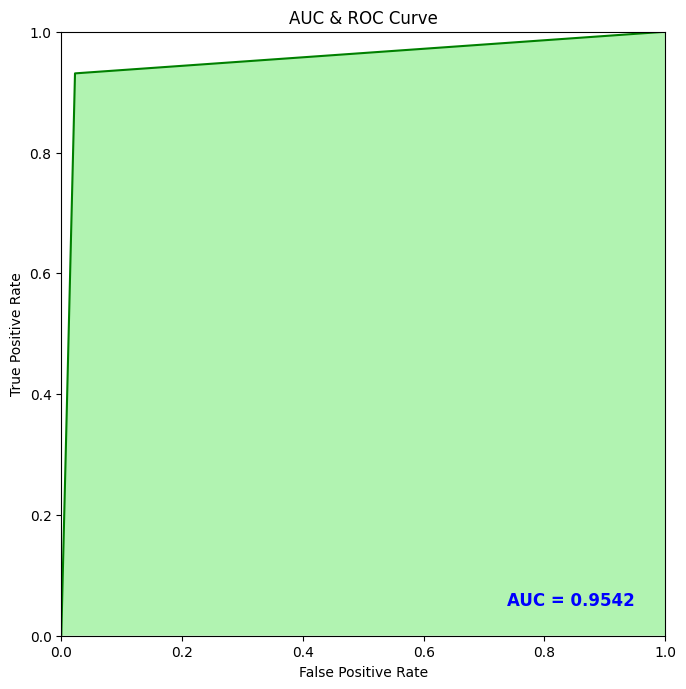

In [55]:
#AUC curve

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, log_reg_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()